In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
##pass int the dataset from mnist
mnist = tf.keras.datasets.mnist  # 0-9 hand-written digits
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("X train:", np.shape(x_train));

##we normalize the data so that the neural networks are trained better
#x_train = tf.keras.utils.normalize(x_train, axis=1)
#x_test = tf.keras.utils.normalize(x_test, axis=1)

X train: (60000, 28, 28)


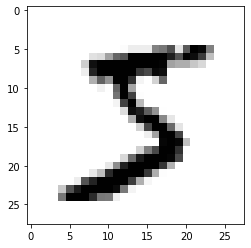

Label of the training data[0]: 5


In [4]:
##visialize the dataset we are dealing with
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
print('Label of the training data[0]:', y_train[0])

In [7]:
##build up the CNN model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) ##input layer
##128 nurons per layer, activation function
model.add(tf.keras.layers.Dense(128, activation=tf.nn.sigmoid))  
model.add(tf.keras.layers.Dense(128, activation=tf.nn.sigmoid)) 
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) 

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)



Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5524 - accuracy: 0.8473
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3435 - accuracy: 0.8971
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3116 - accuracy: 0.9036
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3082 - accuracy: 0.9029
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2913 - accuracy: 0.9104
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2715 - accuracy: 0.9155
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2436 - accuracy: 0.9245
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2382 - accuracy: 0.9254
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2342 - accuracy: 0.9263
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.219

In [6]:
 ##check if the model overfits
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.2227 - accuracy: 0.9298
0.22273670136928558 0.9297999739646912


In [42]:
##we save the model
model.save('CNN_Mnist_Model')
new_model = tf.keras.models.load_model('CNN_Mnist_Model')


INFO:tensorflow:Assets written to: model_saved\assets


Label of the prediction: 2


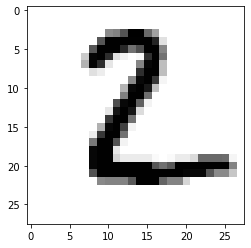

In [43]:
##predict the data with test dataset
predictions = new_model.predict([x_test])
print('Label of the prediction:', np.argmax(predictions[1])) ##the prediction of the 1 value of the testing dataset
plt.imshow(x_test[1], cmap = plt.cm.binary) ##to plot the testing data to verify
plt.show()

In [8]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

model = tf.keras.models.Sequential()


##128 nurons per layer, activation function
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))  
model.add(MaxPooling2D((2, 2))) 
model.add(tf.keras.layers.Flatten()) ##input layer
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform')) 
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 3.5275 - accuracy: 0.7157
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6849 - accuracy: 0.8171
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3189 - accuracy: 0.9246
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1872 - accuracy: 0.9560
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1328 - accuracy: 0.9679
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1026 - accuracy: 0.9747
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0921 - accuracy: 0.9783
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0760 - accuracy: 0.9812
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0626 - accuracy: 0.9840
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.057

In [6]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1467 - accuracy: 0.9737
0.14668887853622437 0.9736999869346619
